# Euler - Maruyama for SDE

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

In [21]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [22]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

In [23]:
x = np.zeros(n)

In [24]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

In [25]:
So = 100
r  = 0.02
sigma = 0.25
mu = np.log(So)+ (r-sigma**2/2)

In [26]:
np.mean(x)

9.496774113242635

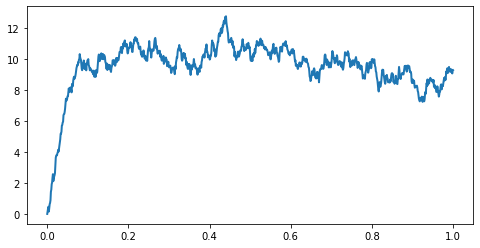

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

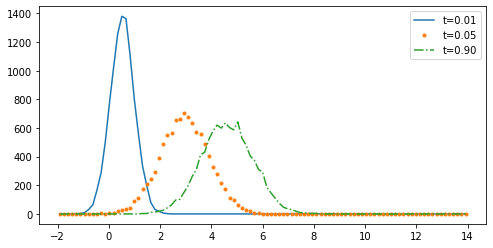

In [30]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) +  sigma_bis  * np.random.normal(0,sqrtdt,ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
ax.legend()

# Euler for ODE 

In [31]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

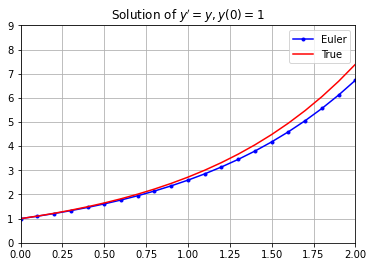

In [32]:
t = np.linspace(0,2,21)
y0 = 1
f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t)
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=1$")
plt.show()

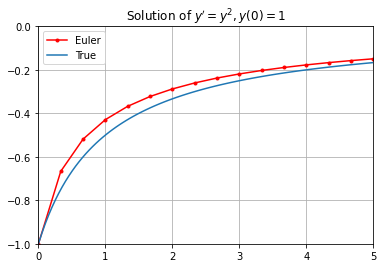

In [33]:
t = np.linspace(0,5,16)
y0 = -1
f = lambda y,t: y**2
y = odeEuler(f,y0,t)
t_true = np.linspace(0,5,100)
y_true = -1/(t_true + 1)
plt.plot(t,y,'r.-',t_true,y_true)
plt.legend(['Euler','True'])
plt.grid(True)
plt.axis([0,5,-1,0])
plt.title("Solution of $y'=y^2 , y(0)=1$")
plt.show()

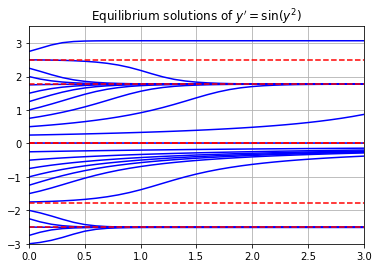

In [34]:
t0 = 0; tf = 3; h = 0.1;

f = lambda y,t: np.sin(y**2)

t = np.arange(t0,tf+h,h)

for y0 in np.arange(-3,3,0.25):
    y = odeEuler(f,y0,t)
    plt.plot(t,y,'b')

for k in range(0,3):
    y_eq = np.sqrt(k*np.pi)
    plt.plot([t0,tf],[y_eq,y_eq],'r--')
    plt.plot([t0,tf],[-y_eq,-y_eq],'r--')

plt.grid(True)
plt.axis([0,3,-3,3.5])
plt.title("Equilibrium solutions of $y'=\sin(y^2)$")
plt.show()